# Imports and Packages

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, diff
from matplotlib import cm
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example 1 - Simple Cost Function
$f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

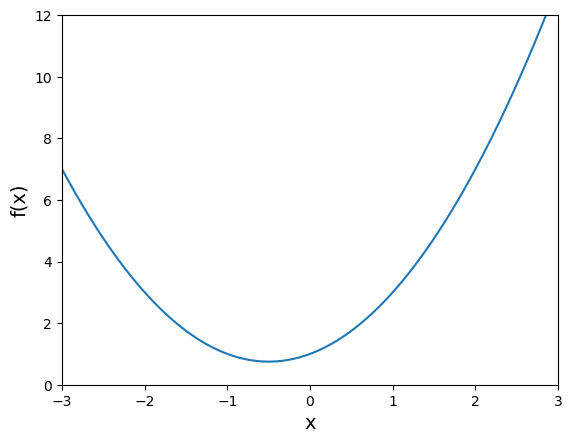

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 12)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.plot(x_1, f(x_1))
plt.show()

## Slopes & Derivatives

In [5]:
# derivative of f(x)
def df(x):
    return 2 * x + 1

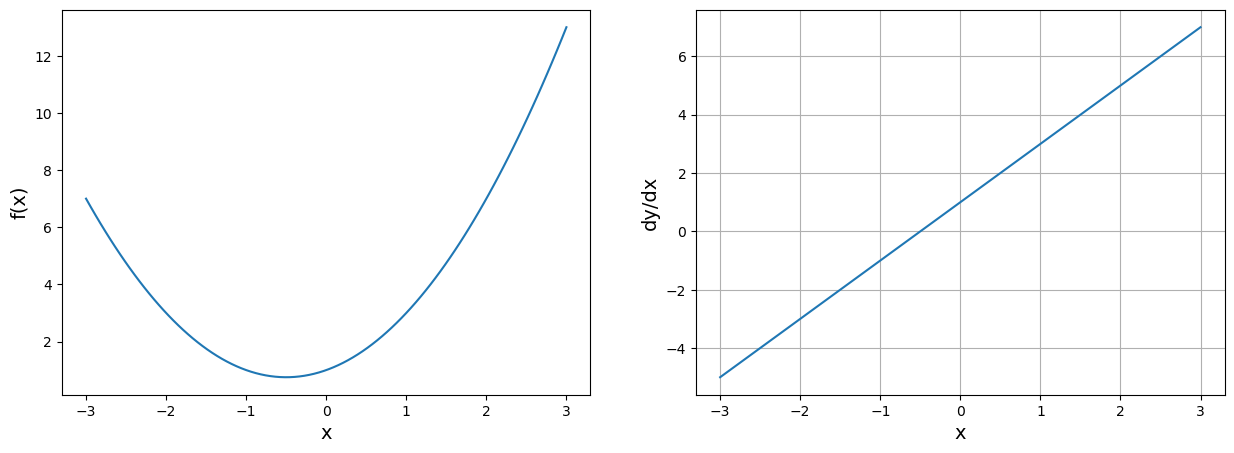

In [6]:
# Plot function & derivative

plt.figure(figsize=[15, 5])

# row 1, two columns, column 1
plt.subplot(1,2,1)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.plot(x_1, f(x_1))

# row 1, two columns, column 2
plt.subplot(1,2,2)
plt.xlabel("x", fontsize=14)
plt.ylabel("dy/dx", fontsize=14)
plt.plot(x_1, df(x_1))
plt.grid()
plt.show()

In [7]:
#Gradient Descent
# Needs a starting point, learning rate, and temporary value
new_x = 3
previous_x = 0 # temp value that only matters in loop
step_multiplier = 0.1 # learning multiplier/gamma
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for i in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    if step_size <= precision:
        break
    
print(f'Local Minimum: {new_x}')
print(f'Slope of df(x): {df(new_x)}')
print(f'f(x) or cost: {f(new_x)}')

Local Minimum: -0.49962781616118024
Slope of df(x): 0.0007443676776395236
f(x) or cost: 0.7500001385208099


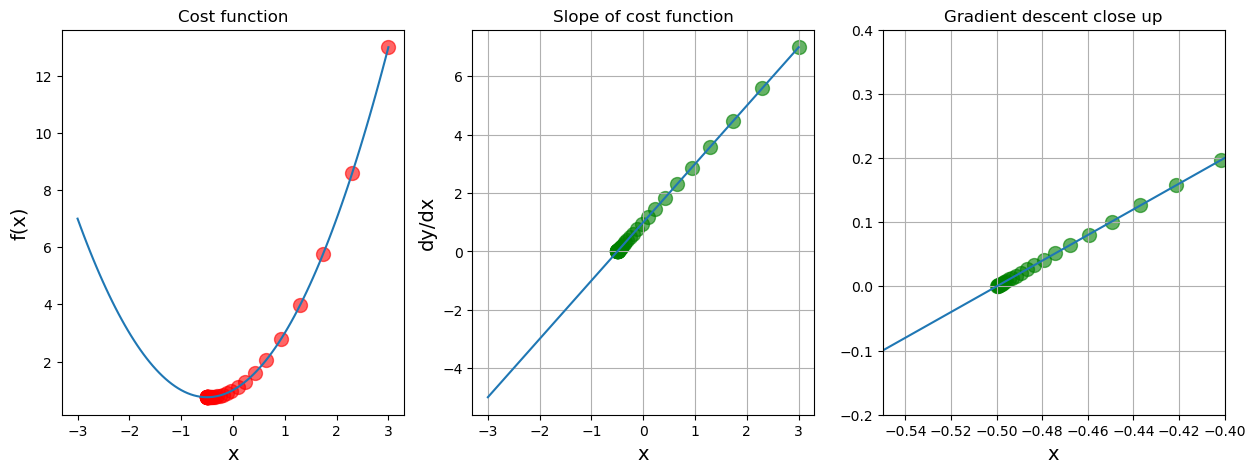

In [8]:
# Superimpose gradient descent calculations

plt.figure(figsize=[15, 5])

# row 1, three columns, column 1
plt.subplot(1,3,1)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.title('Cost function')
plt.plot(x_1, f(x_1))

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# row 1, three columns, column 2
plt.subplot(1,3,2)
plt.xlabel("x", fontsize=14)
plt.ylabel("dy/dx", fontsize=14)
plt.title('Slope of cost function')
plt.plot(x_1, df(x_1))

plt.scatter(x_list, slope_list, color='green', s=100, alpha=0.6)

plt.grid()

# row 1, three columns, column 3
plt.subplot(1,3,3)
plt.xlabel("x", fontsize=14)
plt.title('Gradient descent close up')
plt.xlim(-0.55, -0.4)
plt.ylim(-0.2, 0.4)
plt.plot(x_1, df(x_1))

plt.scatter(x_list, slope_list, color='green', s=100, alpha=0.6)

plt.grid()
plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# function g
def g(x):
    return (x ** 4) - (4 * (x ** 2)) + 5

# function g', derivative of g
def gPrime(x):
    return 4 * (x ** 3) - (8 * x)


C:\Users\joshh\AppData\Local\Temp\ipykernel_1624\3826785944.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_2, [0] * len(x_2), 'g--', color='red')


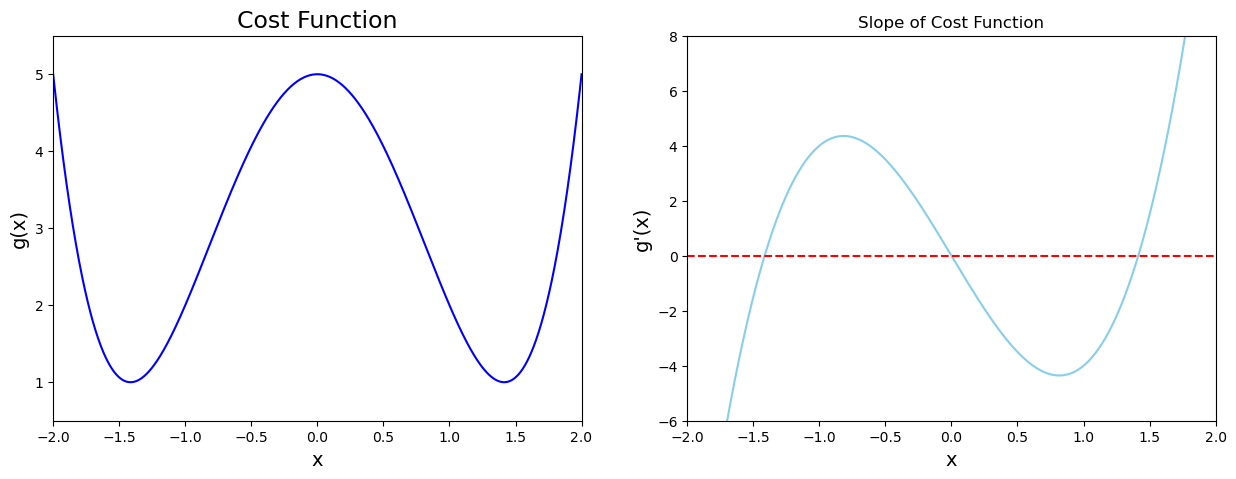

In [10]:
plt.figure(figsize=[15, 5])

# 1 row, 2 columns, column 1
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

plt.plot(x_2, g(x_2), color='blue')

# 1 row, 2 columns, column 2
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of Cost Function')
plt.xlabel('x', fontsize=14)
plt.ylabel('g\'(x)', fontsize=14)

plt.plot(x_2, gPrime(x_2), color='skyblue')
plt.plot(x_2, [0] * len(x_2), 'g--', color='red')

## Gradient Descent Python Function (Batch)

In [11]:
# required arguments: derivative is a function pointer, initial guess is num
# optional arguments: learning_rate default to 0.02, precision default to 0.001
def gradient_descent(derivative, initial_guess, learning_rate=0.02, precision=0.001, max_iter=300):

    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative(new_x)]

    for i in range(max_iter):
        previous_x = new_x
        gradient = derivative(previous_x)
        new_x = previous_x - learning_rate * gradient
        
        step_size = abs(new_x - previous_x)
        
        x_list.append(new_x)
        slope_list.append(derivative(new_x))
        
        if step_size <= precision:
            break
    
    return new_x, x_list, slope_list

In [12]:
# gets one of two local minima
local_min, list_x, list_deriv = gradient_descent(derivative=gPrime, initial_guess=-0.5)
print(f'Local min: {local_min}')
print(f'Number of steps: {len(list_x)}')

Local min: -1.4122375085019094
Number of steps: 23


In [13]:
# gets two of two local minima
local_min2, list_x2, list_deriv2 = gradient_descent(derivative=gPrime, 
                                                 initial_guess=0.5,
                                                 learning_rate=0.02,
                                                 precision=0.001)
print(f'Local min: {local_min}')
print(f'Number of steps: {len(list_x)}')

Local min: -1.4122375085019094
Number of steps: 23


C:\Users\joshh\AppData\Local\Temp\ipykernel_1624\3616753741.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_2, [0] * len(x_2), 'g--', color='red')


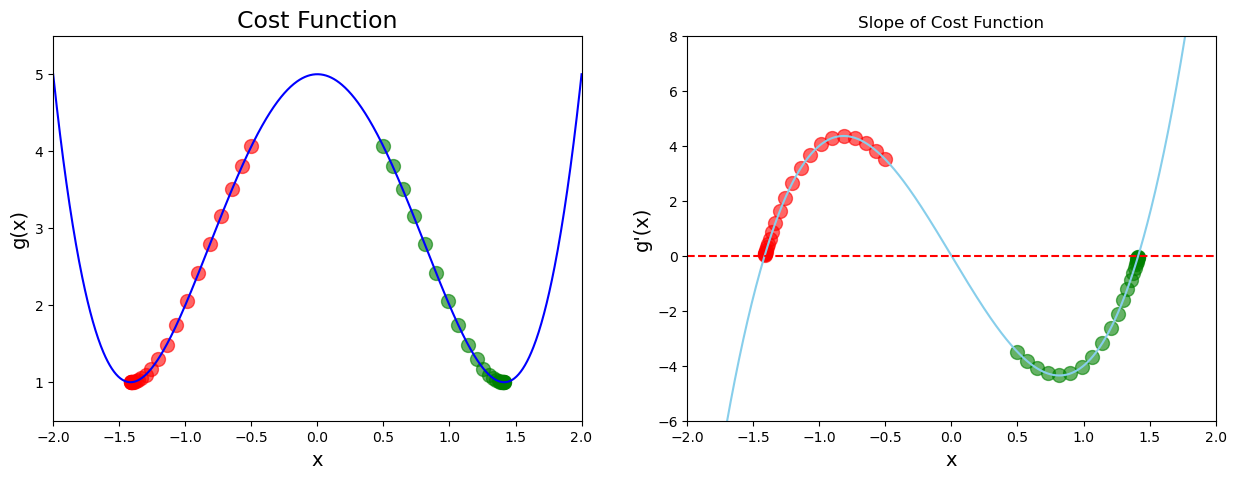

In [14]:
plt.figure(figsize=[15, 5])

# 1 row, 2 columns, column 1
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

list_gx = np.array(list_x)
list_gx2 = np.array(list_x2)
plt.scatter(list_x, g(list_gx), color='red', s=100, alpha=0.6)
plt.scatter(list_x2, g(list_gx2), color='green', s=100, alpha=0.6)

plt.plot(x_2, g(x_2), color='blue')

# 1 row, 2 columns, column 2
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of Cost Function')
plt.xlabel('x', fontsize=14)
plt.ylabel('g\'(x)', fontsize=14)

plt.scatter(list_x, list_deriv, color='red', s=100, alpha=0.6)
plt.scatter(list_x2, list_deriv2, color='green', s=100, alpha=0.6)

plt.plot(x_2, gPrime(x_2), color='skyblue')
plt.plot(x_2, [0] * len(x_2), 'g--', color='red')

# Divergence, Overflow, Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [15]:
# make data

In [16]:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

In [17]:
local_min, list_x, deriv_list = gradient_descent(derivative=dh, initial_guess=0.2)

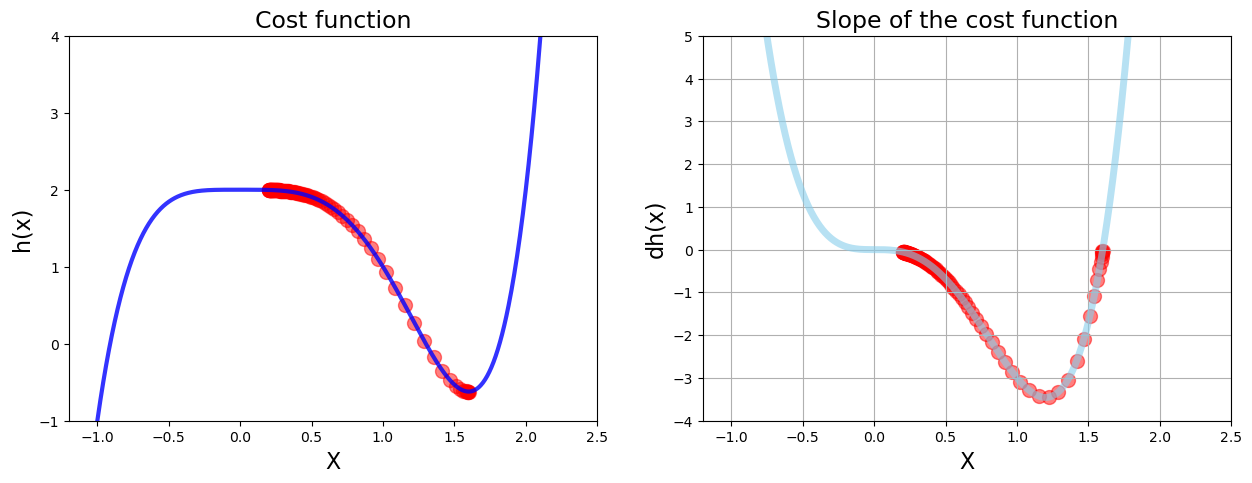

In [18]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize=17)

plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.grid()
plt.xlim(-1.2, 2.5)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

In [19]:
import sys
#help(sys)

In [20]:
sys.version

'3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:47:18) [MSC v.1916 64 bit (AMD64)]'

In [21]:
sys.float_info.max

1.7976931348623157e+308

## Tuples

In [22]:
# Creating a tuple
breakfast = 'bacon', 'egg', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print(f'I love {breakfast[0]}')

# tuples are immutable
# breakfast[0] = 'sausage' is invalid

#sequence unpacking
main, side, greens = breakfast

I love bacon


# Learning Rate

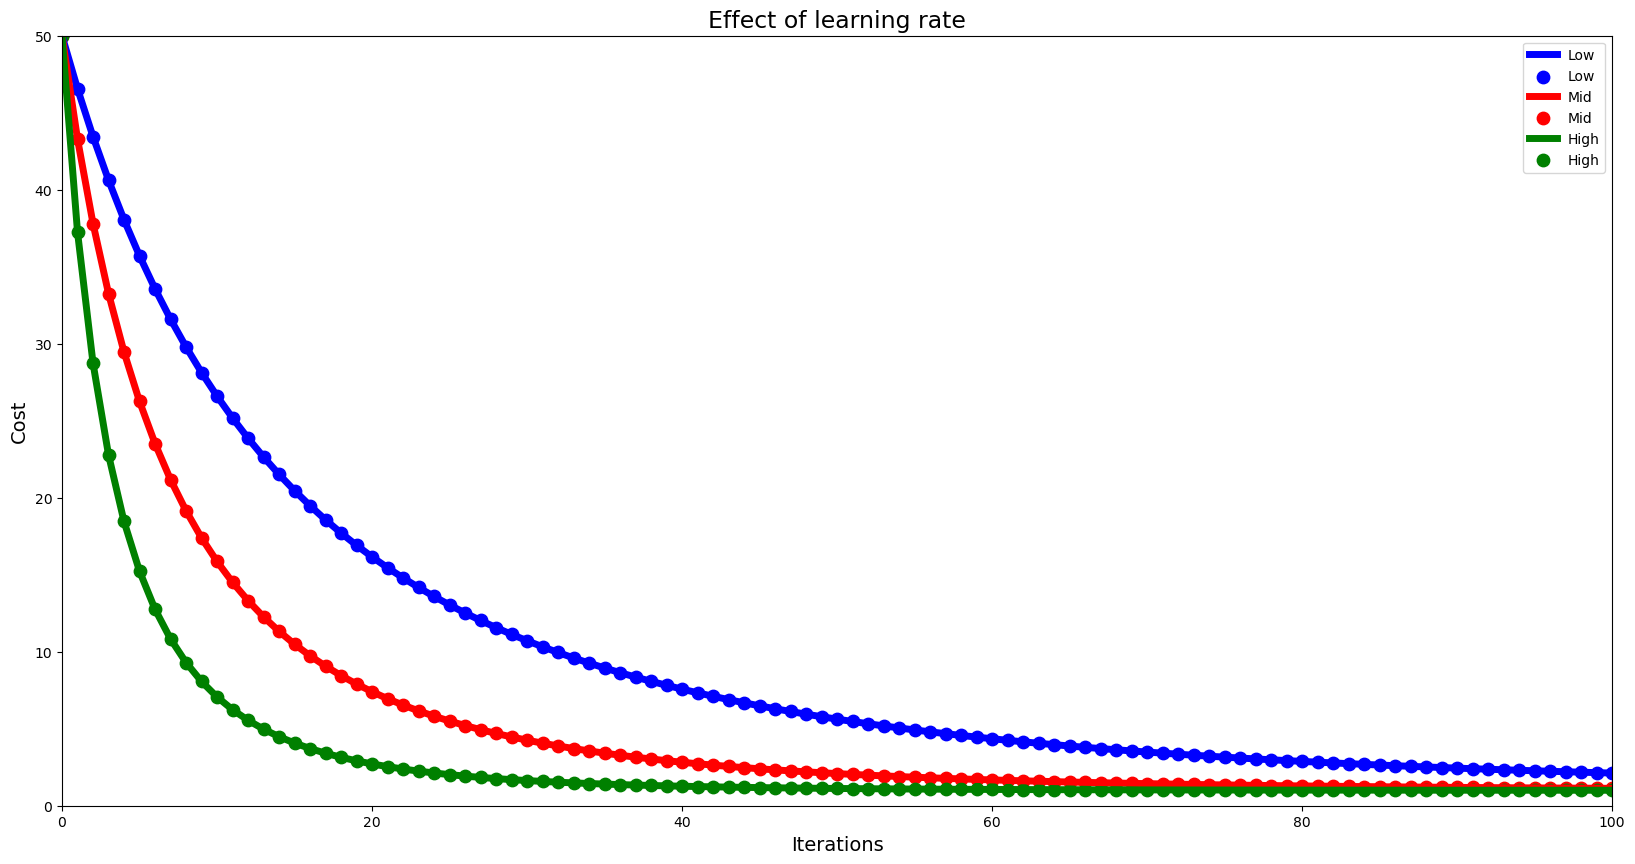

In [23]:
# gets two of two local minima
n = 100
low_gamma = gradient_descent(derivative=gPrime, 
                             initial_guess=3, 
                             learning_rate=0.0005, 
                             precision=0.0001, 
                             max_iter=n)

mid_gamma = gradient_descent(derivative=gPrime, 
                             initial_guess=3, 
                             learning_rate=0.001, 
                             precision=0.0001, 
                             max_iter=n)

high_gamma = gradient_descent(derivative=gPrime, 
                             initial_guess=3, 
                             learning_rate=0.002, 
                             precision=0.0001, 
                             max_iter=n)

plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of learning rate', fontsize=17)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost', fontsize=14)

# Values for charts
# Y Axis Data: convert lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# X Axis Data: create list from 0 to n+1
iteration_list = [i for i in range(n+1)]

# low learning rate
plt.plot(iteration_list, g(low_values), color='blue', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='blue', s=80)

# Mid learning rate
plt.plot(iteration_list, g(mid_values), color='red', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='red', s=80)

# Mid learning rate
plt.plot(iteration_list, g(high_values), color='green', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='green', s=80)

plt.legend(['Low', 'Low', 'Mid', 'Mid', 'High', 'High'])

# 3D Data Visualization
## $f(x, y) = \frac{1}{3^(-x^2 - y^2) + 1}$

In [24]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [25]:
# make data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

In [26]:
x_4.shape

(200,)

In [27]:
y_4.shape

(200,)

In [28]:
x_4, y_4 = np.meshgrid(x_4, y_4)

In [29]:
x_4.shape

(200, 200)

In [30]:
y_4.shape

(200, 200)

In [31]:
z_4 = f(x_4, y_4)

In [32]:
z_4.shape

(200, 200)

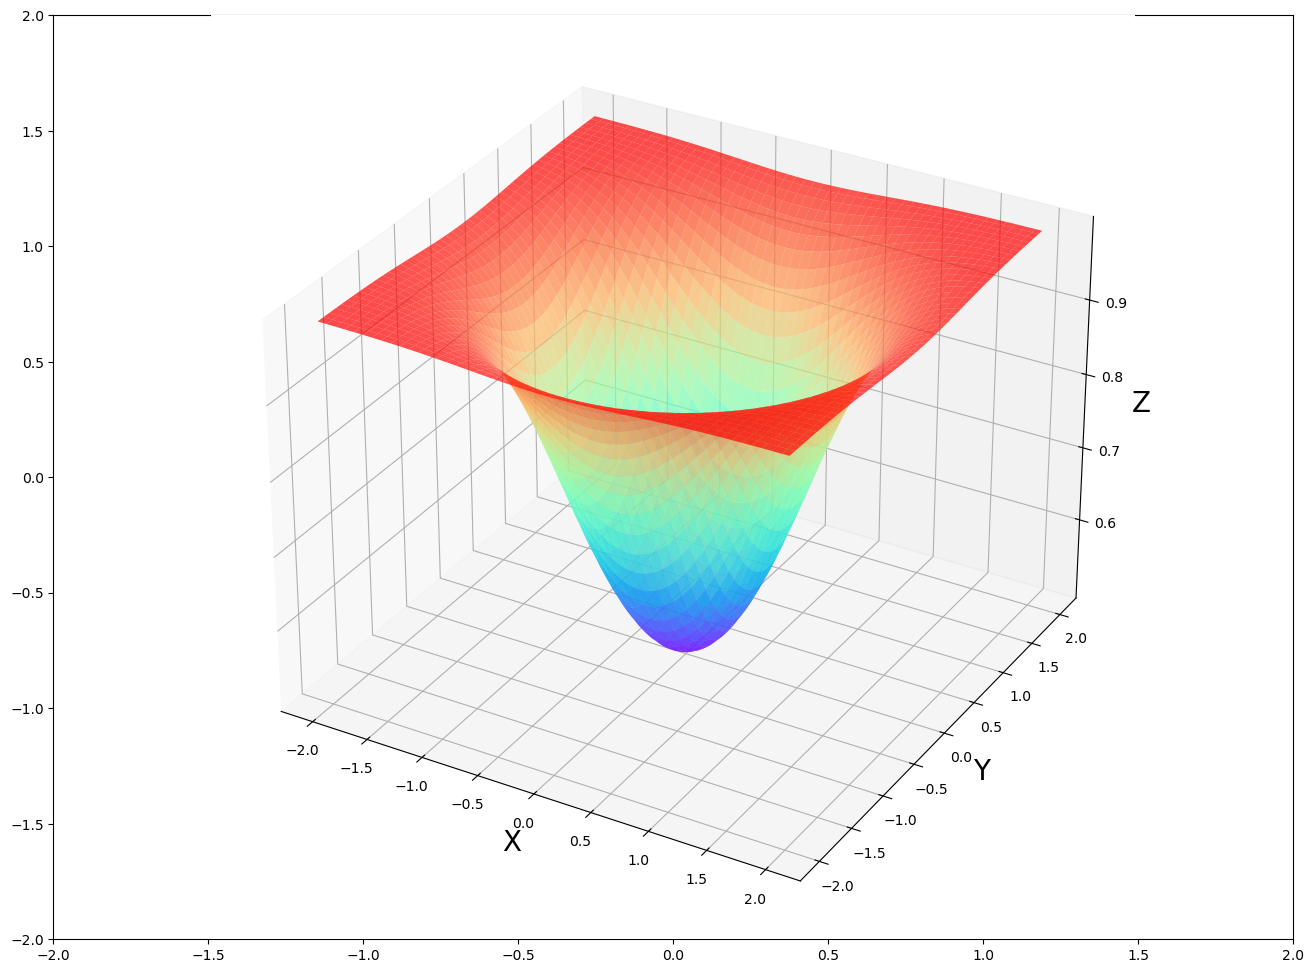

In [33]:
# Generate 3D plot
fig = plt.figure(figsize=[16, 12])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
ax.plot_surface(x_4, y_4, z_4, cmap=cm.rainbow, alpha=0.7)
plt.show()

## Partial Derivatives with SymPy

### $$\frac{\partial f}{\partial x} = \frac{2x\ln(3) \cdot 3 ^ {-x^2 - y^2}}{(3^{-x^2-y^2}+1)^2}$$

### $$\frac{\partial f}{\partial y} = \frac{2y\ln(3) \cdot 3 ^ {-x^2 - y^2}}{(3^{-x^2-y^2}+1)^2}$$

In [34]:
a, b = symbols('x, y')
f(a, b)

1/(3**(-x**2 - y**2) + 1)

In [35]:
diff(f(a, b), a)

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [36]:
f(a, b).evalf(subs={a:1.8, b:1.0})

0.990604794032582

In [37]:
diff(f(a, b), a).evalf(subs={a:1.8, b:1.0})

0.0368089716197505

## Batch Gradient Descent with SymPy

In [38]:
# Setup
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for i in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    
    params = params - (learning_rate * gradients)

print(f'Gradient array: {gradients}')
print(f'Minimum x: {params[0]}')
print(f'Minimum y: {params[1]}')
print(f'Cost: {f(params[0], params[1])}')
    

Gradient array: [2.01013037525579e-11 1.11673909736433e-11]
Minimum x: 3.45838599885832E-11
Minimum y: 1.92132555492129E-11
Cost: 0.500000000000000


In [39]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [40]:
# Setup
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for i in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    
    params = params - (learning_rate * gradients)

print(f'Gradient array: {gradients}')
print(f'Minimum x: {params[0]}')
print(f'Minimum y: {params[1]}')
print(f'Cost: {f(params[0], params[1])}')
    

Gradient array: [2.01013038e-11 1.11673910e-11]
Minimum x: 3.458385998858304e-11
Minimum y: 1.9213255549212797e-11
Cost: 0.5


## Graphing 3D Gradient Descent

In [41]:
# advanced numpy practice
kirk = np.array([['captain', 'guitar']])
kirk.shape

(1, 2)

In [42]:
hs_band = np.array([['black thought', 'mc'], ['questlove', 'drums']])
hs_band.shape

(2, 2)

In [43]:
hs_band[0]

array(['black thought', 'mc'], dtype='<U13')

In [44]:
hs_band[0][1]

'mc'

In [45]:
roots = np.append(arr=hs_band, values=kirk, axis=0)

print(roots)

[['black thought' 'mc']
 ['questlove' 'drums']
 ['captain' 'guitar']]


In [46]:
roots[:, 0]

array(['black thought', 'questlove', 'captain'], dtype='<U13')

In [47]:
roots[1, :]

array(['questlove', 'drums'], dtype='<U13')

In [48]:
# Setup
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)

for i in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    
    params = params - (learning_rate * gradients)
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)

print(f'Gradient array: {gradients}')
print(f'Minimum x: {params[0]}')
print(f'Minimum y: {params[1]}')
print(f'Cost: {f(params[0], params[1])}')
    

Gradient array: [2.01013038e-11 1.11673910e-11]
Minimum x: 3.458385998858304e-11
Minimum y: 1.9213255549212797e-11
Cost: 0.5


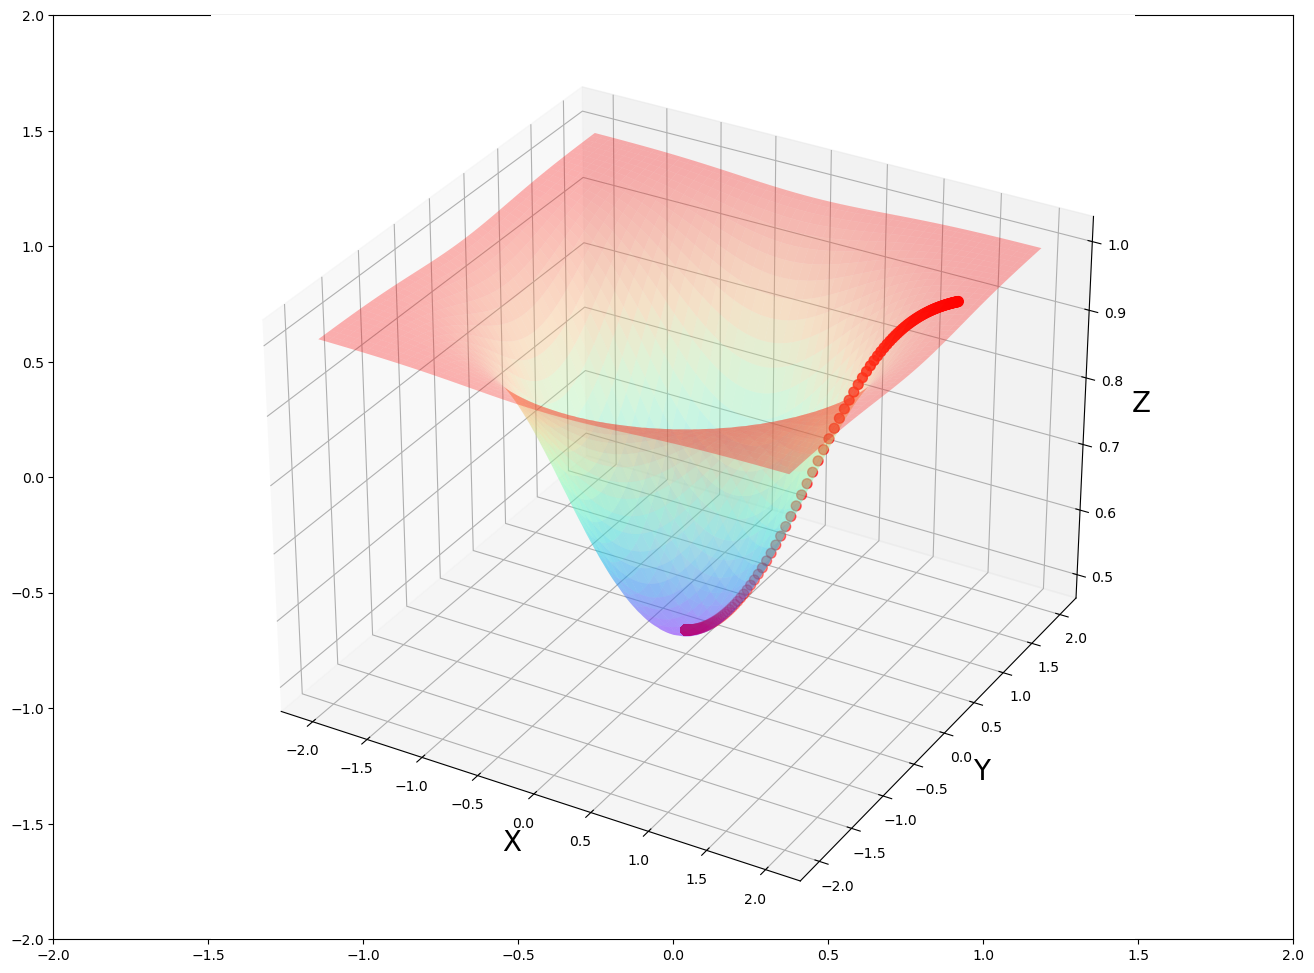

In [83]:
# Generate 3D plot
fig = plt.figure(figsize=[16, 12])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
ax.plot_surface(x_4, y_4, z_4, cmap=cm.rainbow, alpha=0.3)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')
plt.show()

In [50]:
print(values_array[:5])
print(values_array[:5, 0])
print(values_array[:5][0])
print(values_array[:5, 1])
print(values_array[0, 1])
print(values_array[0][1])

[[1.8        1.        ]
 [1.7963191  0.99795506]
 [1.7925765  0.99587584]
 [1.7887703  0.99376128]
 [1.78489851 0.99161028]]
[1.8        1.7963191  1.7925765  1.7887703  1.78489851]
[1.8 1. ]
[1.         0.99795506 0.99587584 0.99376128 0.99161028]
1.0
1.0


# Mean Squared Error

## A cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [51]:
# Make data
x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(-1, 1)
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(-1, 1)

print(x_5.shape)
print(y_5.shape)

(7, 1)
(7, 1)


In [52]:
regr = LinearRegression()
regr.fit(x_5, y_5)

LinearRegression()

In [53]:
print(f'Theta 0: {regr.intercept_[0]}')
print(f'Theta 1: {regr.coef_[0][0]}')

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


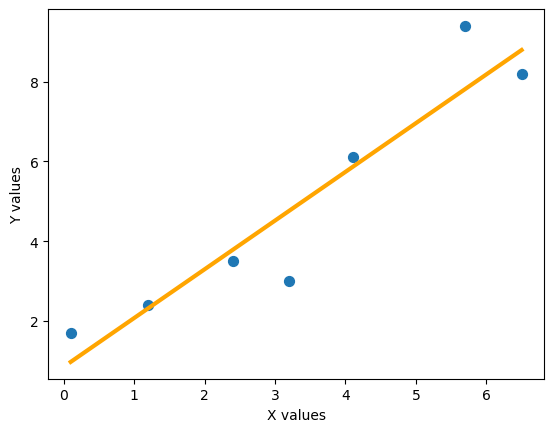

In [54]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [55]:
 # y_hat = theta0 + theta1*x
 
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
y_hat

array([[0.96980779],
       [2.31480691],
       [3.78207866],
       [4.76025983],
       [5.86071365],
       [7.81707599],
       [8.79525716]])

In [56]:
y_5

array([[1.7],
       [2.4],
       [3.5],
       [3. ],
       [6.1],
       [9.4],
       [8.2]])

In [60]:
def mse(y, y_hat):
    # return np.average((y - y_hat)**2, axis=0)
    return sum((y - y_hat)**2) / len(y)

In [61]:
mse(y_5, y_hat)

array([0.94796558])

In [63]:
mean_squared_error(y_pred=y_hat, y_true=y_5)

0.9479655759794577

In [71]:
# Plot for MSE
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

In [72]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
plot_cost

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
for i in range(nr_thetas):
    for ix in range(nr_thetas):
        y_hat = plot_t0[i][ix] + plot_t1[i][ix] * x_5
        plot_cost[i][ix] = mse(y_5, y_hat)

plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

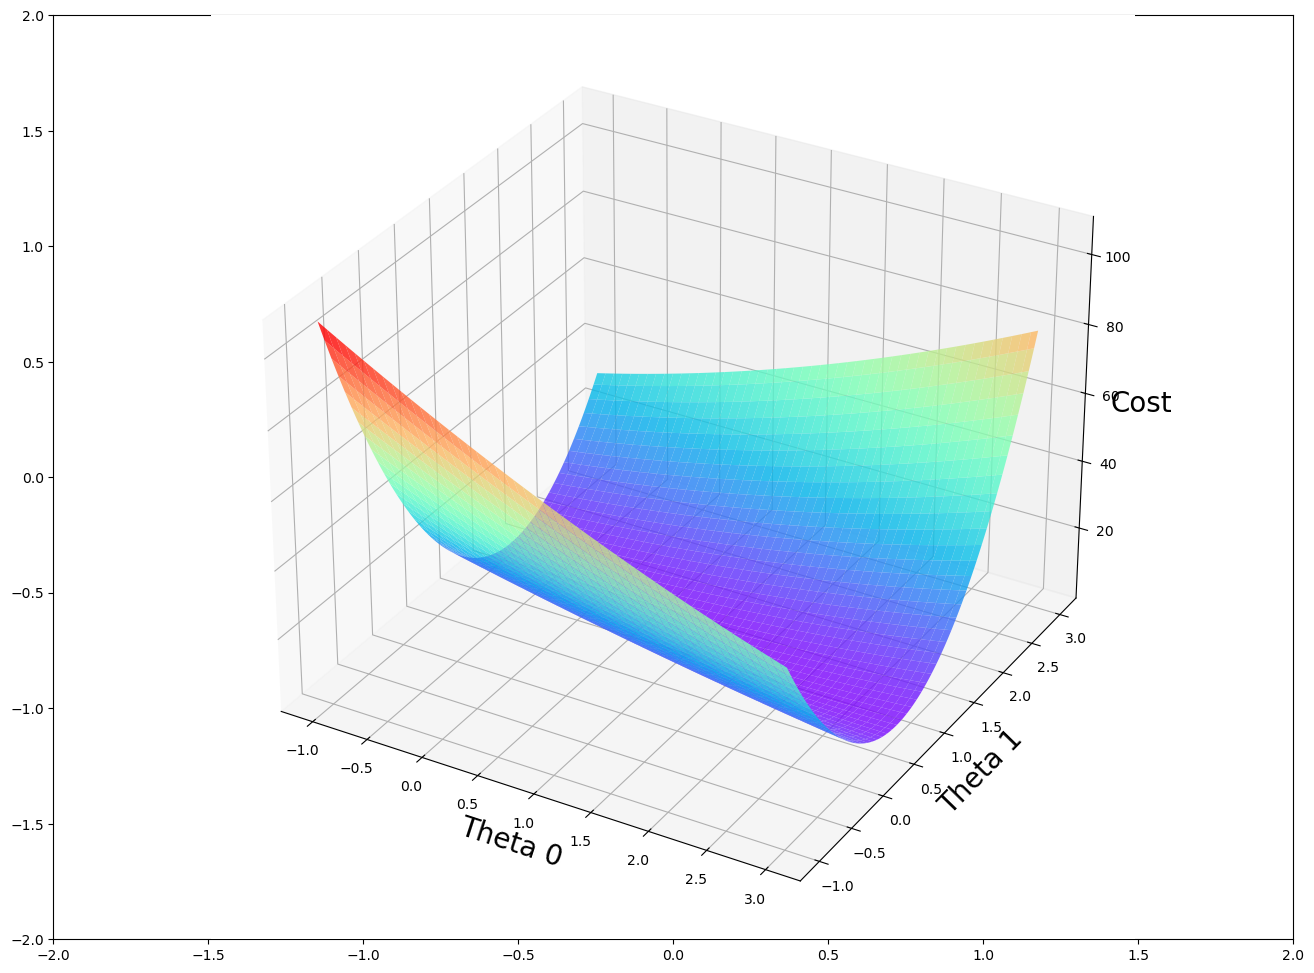

In [74]:
# Plot MSE

fig = plt.figure(figsize=[16, 12])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost', fontsize=20)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.8)
plt.show()

In [75]:
print(f'Min value of plot_cost {plot_cost.min()}')

Min value of plot_cost 0.9483826526747164


In [78]:
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
ij_min

(111, 91)

In [79]:
print(f'MIN MSE Theta 0: {plot_t0[111][91]}')
print(f'MIN MSE Theta 1: {plot_t1[111][91]}')

MIN MSE Theta 0: 0.829145728643216
MIN MSE Theta 1: 1.2311557788944723


## Partials of MSE

### $$\frac{\partial MSE}{\partial \theta_0} = \frac{-2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)^2 $$

### $$\frac{\partial MSE}{\partial \theta_1} = \frac{-2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)^2 \big( x^{(i)} \big) $$

In [80]:
def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)
    
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [84]:
learning_rate = 0.01
thetas = np.array([2.9, 2.9])

plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)
for i in range(1000):
    thetas = thetas - learning_rate * grad(x_5, y_5, thetas)
    
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1] * x_5))
    
    
print(f'Min theta 0: {thetas[0]}')
print(f'Min theta 1: {thetas[1]}')
print(f'MSE: {mse(y_5, thetas[0] + thetas[1] * x_5)}')

Min theta 0: 0.8532230461743415
Min theta 1: 1.2214935332607393
MSE: [0.94797511]


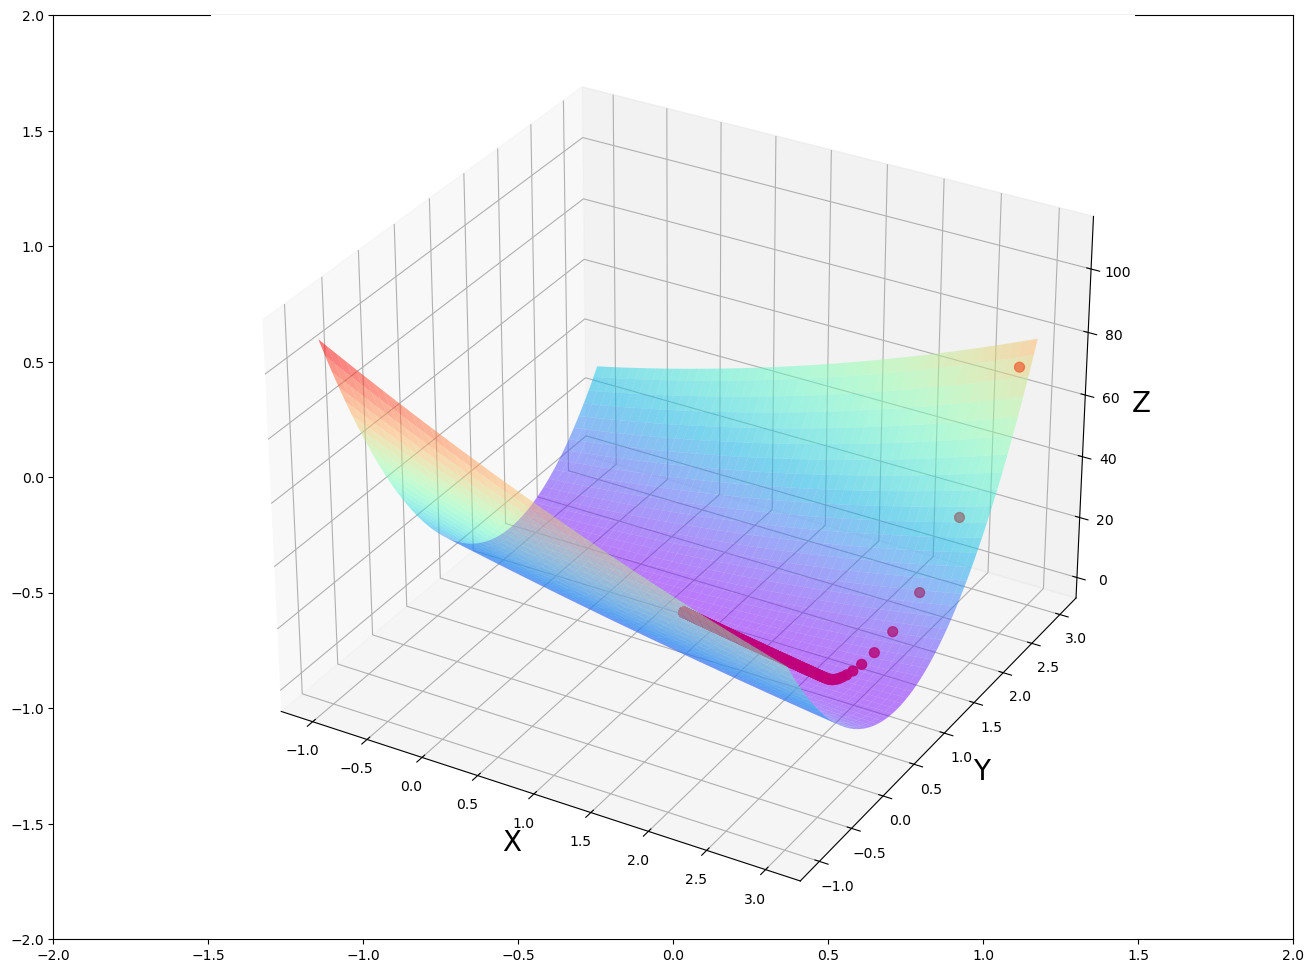

In [85]:
# Generate 3D plot
fig = plt.figure(figsize=[16, 12])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.5)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=50, color='red')
plt.show()